In [1]:
# Load Require Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
dataset = pd.read_csv(r"D:\OneDrive\Desktop\Dataset\spam.csv",encoding='ISO-8859-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Step 1 : Data Cleaning

In [3]:
# Check the shape
dataset.shape

(5572, 5)

In [4]:
# check null value
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# check null value percentage
(dataset.isnull().sum()/dataset.shape[0])*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [6]:
# drop columns with most null values
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
# Apply label encoder to the target column
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()
dataset['v1']=encoder.fit_transform(dataset['v1'])

In [8]:
# Rename for better understanding
dataset.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [9]:
# Check null value
dataset.isnull().sum()

Target    0
Text      0
dtype: int64

In [10]:
# Chekc duplicate values
dataset.duplicated().sum()

403

In [11]:
# Drop duplicates keeping first
dataset = dataset.drop_duplicates(keep='first')

Exploratory data Analysis (EDA)

In [12]:
# Final dataset
dataset

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
dataset['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

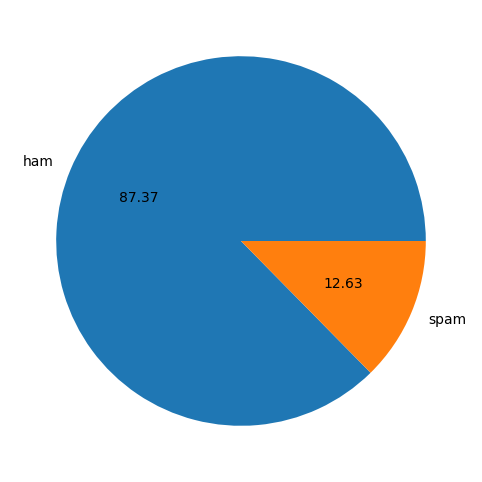

In [14]:
# Pie chart to visulaize the percentage of ham and spam
plt.figure(figsize=(10,6))
plt.pie(dataset['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [15]:
import nltk

In [16]:
# number of character per sms
dataset['number_of_character'] = dataset['Text'].apply(len)

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\2771044717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['number_of_character'] = dataset['Text'].apply(len)


In [17]:
# number of words per sms
dataset['number_of_words'] = dataset['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\2941321340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['number_of_words'] = dataset['Text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [18]:
# number of sentense per sms
dataset['number_of_sentense'] = dataset['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\1459782223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['number_of_sentense'] = dataset['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [19]:
# Description of sms
dataset[['number_of_character','number_of_words','number_of_sentense']].describe()

,number_of_character,number_of_words,number_of_sentense
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
#Description of ham sms
dataset[dataset['Target']==0][['number_of_character','number_of_words','number_of_sentense']].describe()

,number_of_character,number_of_words,number_of_sentense
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# Description of spam sms
dataset[dataset['Target']==1][['number_of_character','number_of_words','number_of_sentense']].describe()

,number_of_character,number_of_words,number_of_sentense
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


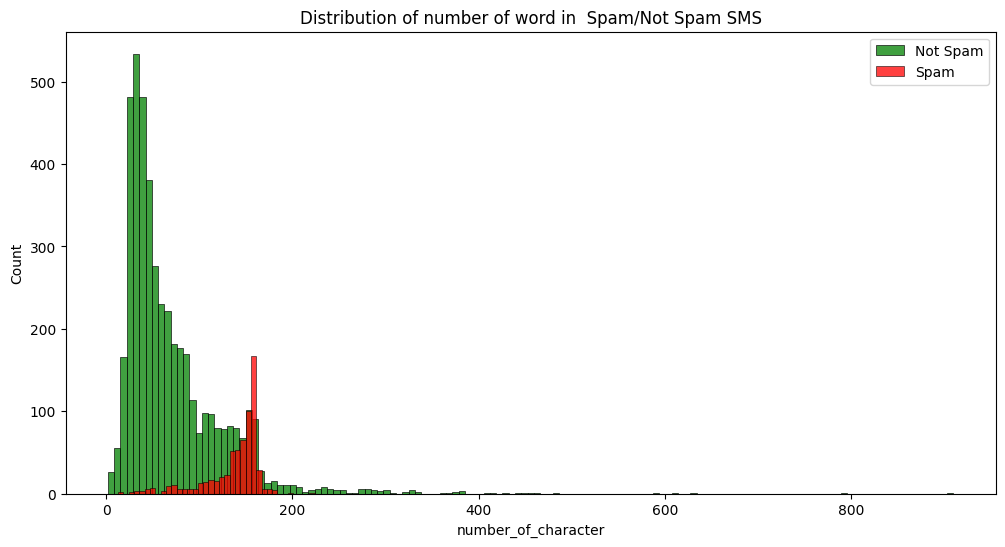

In [22]:
# Plot each histogram separately with distinct colors and labels
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 0]['number_of_character'], color='green', label='Not Spam')
sns.histplot(dataset[dataset['Target'] == 1]['number_of_character'], color='red', label='Spam')

# Add a legend to differentiate between the two histograms
plt.legend()
plt.title("Distribution of number of word in  Spam/Not Spam SMS")
plt.show()


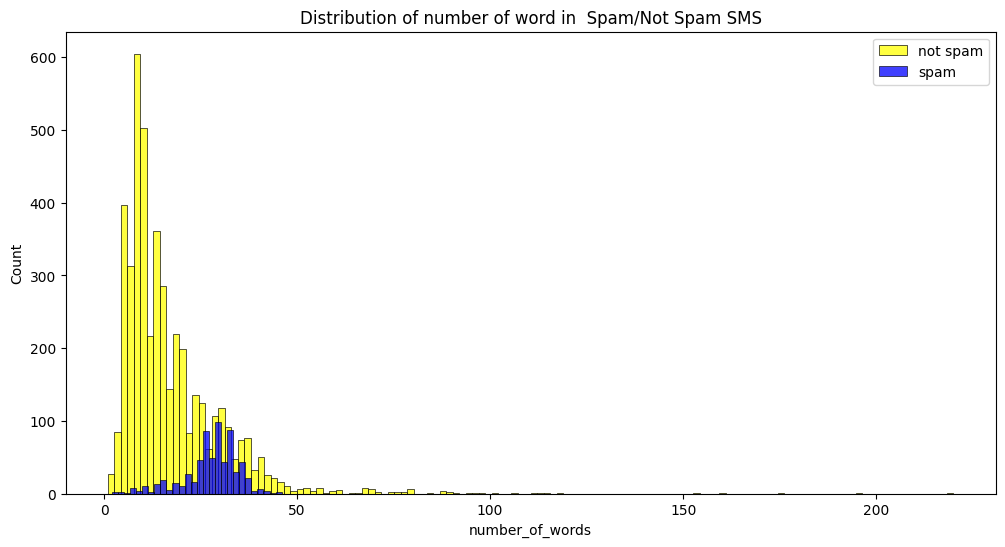

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target']==0]['number_of_words'],color='Yellow',label='not spam')
sns.histplot(dataset[dataset['Target']==1]['number_of_words'],color='blue',label='spam')
plt.legend()
plt.title('Distribution of number of word in  Spam/Not Spam SMS')
plt.show()

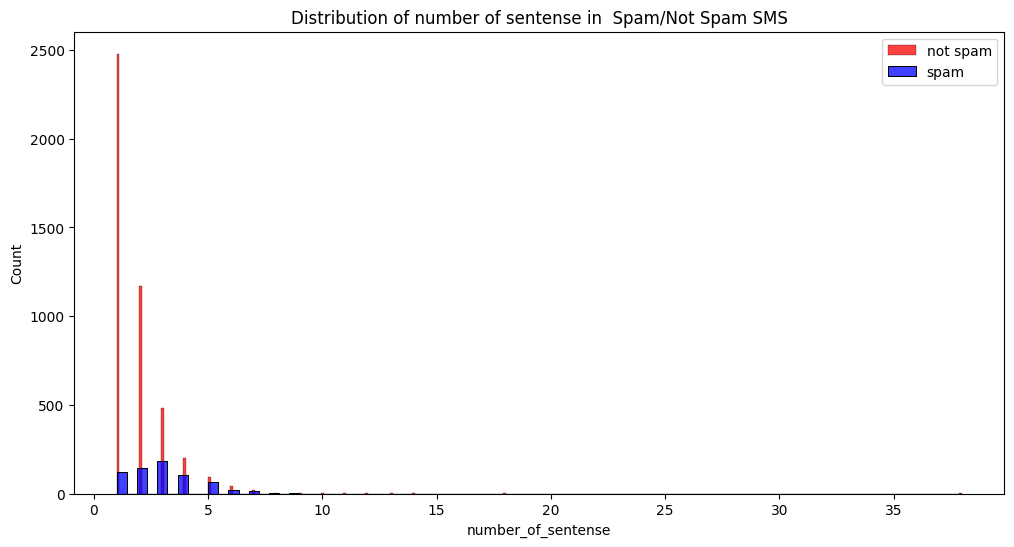

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target']==0]['number_of_sentense'],color='red',label='not spam')
sns.histplot(dataset[dataset['Target']==1]['number_of_sentense'],color='blue',label='spam')
plt.legend()
plt.title('Distribution of number of sentense in  Spam/Not Spam SMS')
plt.show()

<Figure size 1200x600 with 0 Axes>

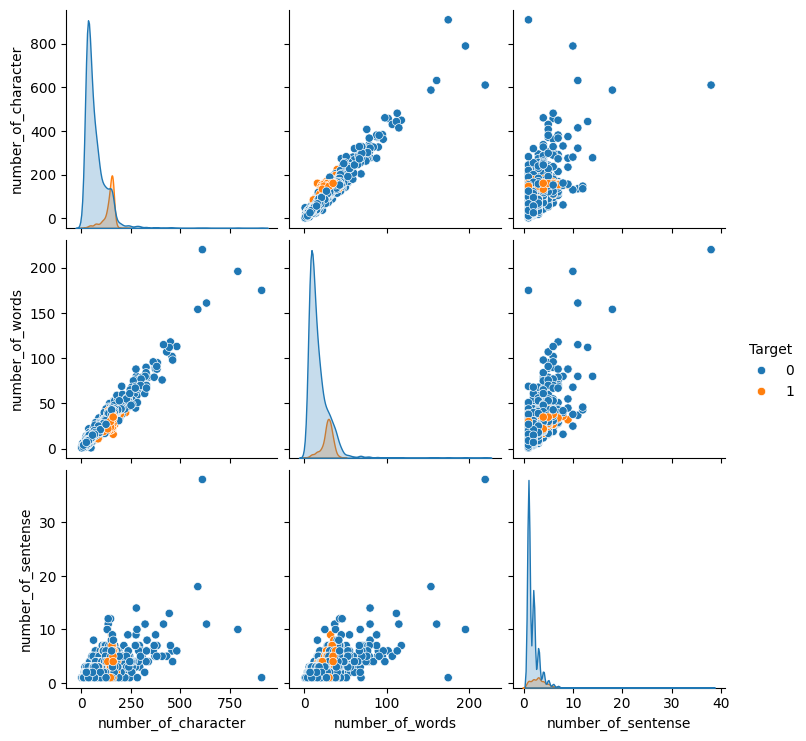

In [25]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,hue='Target')
plt.show()

In [26]:
df = dataset[['Target','number_of_character','number_of_words','number_of_sentense']]
df.corr()

,Target,number_of_character,number_of_words,number_of_sentense
Target,1.000000,0.384717,0.262912,0.263939
number_of_character,0.384717,1.000000,0.965760,0.624139
number_of_words,0.262912,0.965760,1.000000,0.679971
number_of_sentense,0.263939,0.624139,0.679971,1.000000


<Axes: >

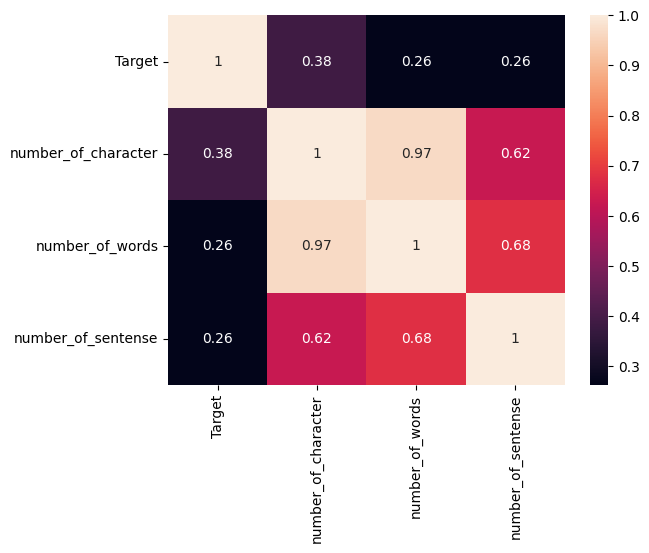

In [27]:
sns.heatmap(df.corr(),annot=True)

Text Preprocessing

In [28]:
dataset 

,Target,Text,number_of_character,number_of_words,number_of_sentense
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
lemmitizer = WordNetLemmatizer()

In [30]:
def transform_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    words = [lemmitizer.lemmatize(word, pos='v') for word in tokens if word not in set(stopwords.words('english'))]
    text = ' '.join(words)
    return text

In [31]:
transform_text('I sent you  &lt;#&gt;  bucks')

'send ltgt buck'

In [32]:
dataset['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [33]:
dataset['Transformed text']=dataset['Text'].apply(transform_text)

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\2384684342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Transformed text']=dataset['Text'].apply(transform_text)


In [34]:
dataset

,Target,Text,number_of_character,number_of_words,number_of_sentense,Transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u u å£750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like id interest buy something e...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

In [36]:
spam_wc = wc.generate(dataset[dataset['Target']==1]['Transformed text'].str.cat(sep=' '))

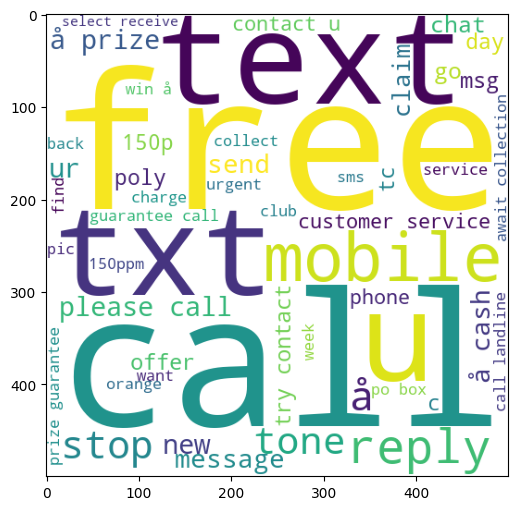

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [38]:
ham_wc = wc.generate(dataset[dataset['Target']==0]['Transformed text'].str.cat(sep=' '))

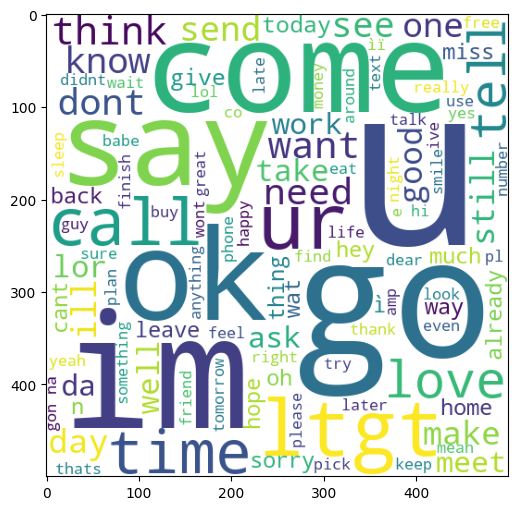

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.show()

In [40]:
spam_corpus = []
text_list = dataset[dataset['Target']==1]['Transformed text'].to_list()
for item in text_list:
    word = word_tokenize(item)
    for w in word:
        spam_corpus.append(w)

In [41]:
len(spam_corpus)

10816

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\1421751629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=word_counts,palette='viridis')


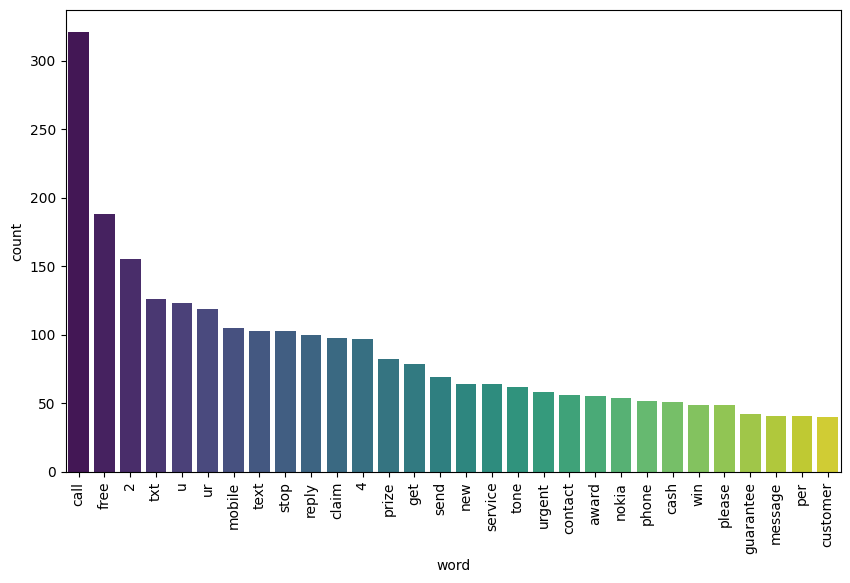

In [42]:
from collections import Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(10,6))
# Plotting
sns.barplot(x='word', y='count', data=word_counts,palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
text_list = dataset[dataset['Target']==0]['Transformed text'].to_list()
for item in text_list:
    word = word_tokenize(item)
    for w in word:
        ham_corpus.append(w)

In [44]:
len(ham_corpus)

37022

C:\Users\atanu\AppData\Local\Temp\ipykernel_28348\3423706024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=word_counts,palette='viridis')


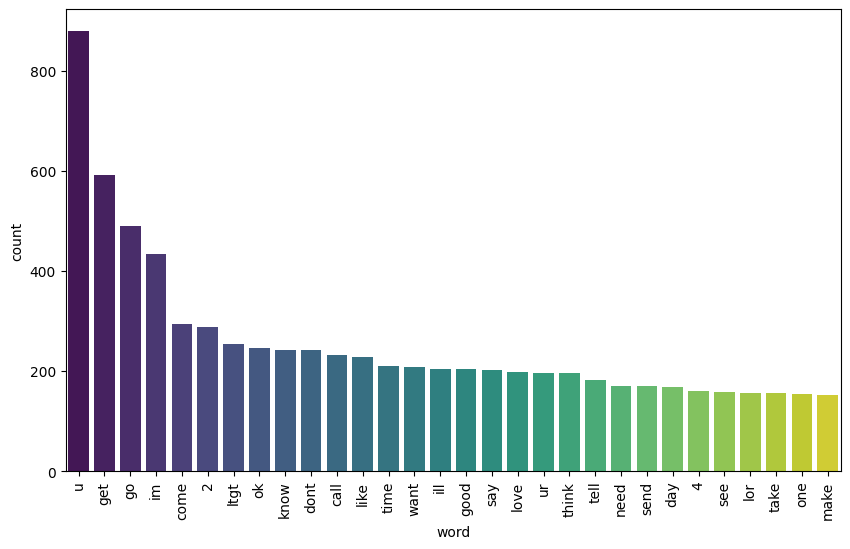

In [45]:
word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(10,6))
# Plotting
sns.barplot(x='word', y='count', data=word_counts,palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# Vectorization (convert text to vectors)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
tfidf = TfidfVectorizer(max_features=3000)
# scaler = MinMaxScaler()

In [48]:
x = tfidf.fit_transform(dataset['Transformed text']).toarray()
# x = scaler.fit_transform(x) # Remove because its reduces precission

In [49]:
dataset

,Target,Text,number_of_character,number_of_words,number_of_sentense,Transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time try 2 contact u u å£750 pound prize 2...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,ì b go esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood soany suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like id interest buy something e...


In [50]:
import numpy as np
# x = np.hstack((x,dataset['number_of_character'].values.reshape(-1,1))) # Reduce accuracy 

In [51]:
x.shape

(5169, 3000)

In [52]:
y = dataset['Target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [56]:
models = {
    'MultinomialNB' : MultinomialNB(),
    'BernoulliNB' : BernoulliNB(),
    'GaussianNB' : GaussianNB()
}

In [57]:

for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print("Performane in Training Data : ")
    print(f"{model_name} Accuracy : {accuracy_score(y_train,y_pred_train)}")
    print(f"{model_name} Precision : {precision_score(y_train,y_pred_train)}")

    print()

    print("Performance in Test data : ")
    print(f"{model_name} Accuracy : {accuracy_score(y_test,y_pred_test)}")
    print(f"{model_name} Precision : {precision_score(y_test,y_pred_test)}")

    print()

Performane in Training Data : 
MultinomialNB Accuracy : 0.9796856106408706
MultinomialNB Precision : 0.9976905311778291

Performance in Test data : 
MultinomialNB Accuracy : 0.971953578336557
MultinomialNB Precision : 1.0

Performane in Training Data : 
BernoulliNB Accuracy : 0.9842805320435308
BernoulliNB Precision : 0.9955947136563876

Performance in Test data : 
BernoulliNB Accuracy : 0.9835589941972921
BernoulliNB Precision : 0.991869918699187

Performane in Training Data : 
GaussianNB Accuracy : 0.8938331318016929
GaussianNB Precision : 0.539832285115304

Performance in Test data : 
GaussianNB Accuracy : 0.8733075435203095
GaussianNB Precision : 0.5150214592274678



Try Other models

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [59]:
models = {
    "Decistion Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "ExtraTreesClassifier" : ExtraTreesClassifier(),
    "BaggingClassifier" : BaggingClassifier(),
    "XGboost" : XGBClassifier(),
    "MultinomialNB" : MultinomialNB(),
    "LogisticRegression" : LogisticRegression()

}

In [60]:
mod_name = []
precision = []
accuracy =[]
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print("Performane in Training Data : ")
    print(f"{model_name} Accuracy : {accuracy_score(y_train,y_pred_train)}")
    print(f"{model_name} Precision : {precision_score(y_train,y_pred_train)}")

    print()

    print("Performance in Test data : ")
    print(f"{model_name} Accuracy : {accuracy_score(y_test,y_pred_test)}")
    print(f"{model_name} Precision : {precision_score(y_test,y_pred_test)}")
    mod_name.append(model_name)
    precision.append(precision_score(y_test,y_pred_test))
    accuracy.append(accuracy_score(y_test,y_pred_test))
    print()

Performane in Training Data : 
Decistion Tree Accuracy : 1.0
Decistion Tree Precision : 1.0

Performance in Test data : 
Decistion Tree Accuracy : 0.9564796905222437
Decistion Tree Precision : 0.8394160583941606

Performane in Training Data : 
SVM Accuracy : 0.9954050785973397
SVM Precision : 1.0

Performance in Test data : 
SVM Accuracy : 0.971953578336557
SVM Precision : 0.9823008849557522

Performane in Training Data : 
KNN Accuracy : 0.924788391777509
KNN Precision : 1.0

Performance in Test data : 
KNN Accuracy : 0.9042553191489362
KNN Precision : 1.0

Performane in Training Data : 
Random Forest Accuracy : 1.0
Random Forest Precision : 1.0

Performance in Test data : 
Random Forest Accuracy : 0.9709864603481625
Random Forest Precision : 0.9736842105263158

Performane in Training Data : 
GradientBoosting Accuracy : 0.9753325272067714
GradientBoosting Precision : 0.9928400954653938

Performance in Test data : 
GradientBoosting Accuracy : 0.9622823984526112
GradientBoosting Precisio

c:\Users\atanu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performane in Training Data : 
AdaBoost Accuracy : 0.9770253929866989
AdaBoost Precision : 0.9605263157894737

Performance in Test data : 
AdaBoost Accuracy : 0.9593810444874274
AdaBoost Precision : 0.9363636363636364

Performane in Training Data : 
ExtraTreesClassifier Accuracy : 1.0
ExtraTreesClassifier Precision : 1.0

Performance in Test data : 
ExtraTreesClassifier Accuracy : 0.9787234042553191
ExtraTreesClassifier Precision : 0.9833333333333333

Performane in Training Data : 
BaggingClassifier Accuracy : 0.9946795646916566
BaggingClassifier Precision : 0.9939879759519038

Performance in Test data : 
BaggingClassifier Accuracy : 0.9564796905222437
BaggingClassifier Precision : 0.8604651162790697

Performane in Training Data : 
XGboost Accuracy : 0.9888754534461911
XGboost Precision : 1.0

Performance in Test data : 
XGboost Accuracy : 0.9729206963249516
XGboost Precision : 0.9661016949152542

Performane in Training Data : 
MultinomialNB Accuracy : 0.9796856106408706
MultinomialNB 

In [61]:
new_df = pd.DataFrame({"Model_name" : mod_name,"Accuracy" : accuracy,"precision" : precision})
new_df

,Model_name,Accuracy,precision
0,Decistion Tree,0.956480,0.839416
1,SVM,0.971954,0.982301
2,KNN,0.904255,1.000000
3,Random Forest,0.970986,0.973684
4,GradientBoosting,0.962282,0.962617
5,AdaBoost,0.959381,0.936364
6,ExtraTreesClassifier,0.978723,0.983333
7,BaggingClassifier,0.956480,0.860465
8,XGboost,0.972921,0.966102
9,MultinomialNB,0.971954,1.000000


In [62]:
# Top models SVC,RandomForest,ExtraTreeclassifier,Multinomial
# We select Multinomial Because Precision is most imporant 

Use GridsearchCV to find best parameter

In [63]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "alpha" : [0.5,1.0],
    "force_alpha" : [True,False],
    'fit_prior' : [True,False]
}

In [64]:
gscv = GridSearchCV(MultinomialNB(),param_grid=parameters,n_jobs=-1,verbose=True)

In [65]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.5, 1.0], 'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             verbose=True)

In [66]:
y_pred = gscv.predict(x_test)

In [67]:
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f" Precision : {precision_score(y_test,y_pred)}")

Accuracy : 0.9777562862669246
 Precision : 0.9914529914529915


In [68]:
# Try with voting classifier with top models
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([('NB',MultinomialNB()),('svc',SVC()),('RF',RandomForestClassifier()),('ETC',ExtraTreesClassifier())],voting='hard')

In [69]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('NB', MultinomialNB()), ('svc', SVC()),
                             ('RF', RandomForestClassifier()),
                             ('ETC', ExtraTreesClassifier())])

In [70]:
y_pred_vote = voting.predict(x_test)

In [71]:
print(f"Accuracy : {accuracy_score(y_test,y_pred_vote)}")
print(f" Precision : {precision_score(y_test,y_pred_vote)}")

Accuracy : 0.9729206963249516
 Precision : 1.0


In [72]:
# Try stracking
estimators = [('NB',MultinomialNB()),('svc',SVC()),('ETC',ExtraTreesClassifier())]
base_model = RandomForestClassifier()

In [73]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators=estimators,final_estimator=base_model,n_jobs=-1)

In [74]:
stacking.fit(x_train,y_train)

StackingClassifier(estimators=[('NB', MultinomialNB()), ('svc', SVC()),
                               ('ETC', ExtraTreesClassifier())],
                   final_estimator=RandomForestClassifier(), n_jobs=-1)

In [75]:
y_pred_stacking = stacking.predict(x_test)

In [76]:
print(f"Accuracy : {accuracy_score(y_test,y_pred_stacking)}")
print(f" Precision : {precision_score(y_test,y_pred_stacking)}")

Accuracy : 0.9806576402321083
 Precision : 0.946969696969697


After trying all the models at the end we select normal MultinomialNB because its give 1.0 Precision and 0.97 accuracy which is quite good

In [77]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_p = mnb.predict(x_test)

In [78]:
from sklearn.metrics import recall_score
print(f"Accuracy : {accuracy_score(y_test,y_p)}")
print(f" Precision : {precision_score(y_test,y_p)}")
print(f"Recall : {recall_score(y_test,y_p)}" )

Accuracy : 0.971953578336557
 Precision : 1.0
Recall : 0.7898550724637681


In [79]:
import pickle
pickle.dump(tfidf,open("Vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))